In [44]:
import altair as alt
import numpy as np
import pandas as pd
from altair_data_server import data_server

In [93]:
# Handle large data sets by not embedding them in the notebook
alt.data_transformers.enable('data_server')

# Save a PNG blob as a backup for when the Altair plots do not render
alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

In [14]:
data = pd.read_csv("data/processed/merged_df.csv", index_col=0)

In [32]:
daytime = range(6, 19)

In [37]:
data['TIME'] = np.where(data.HOUR.isin(daytime), 'day', 'night')

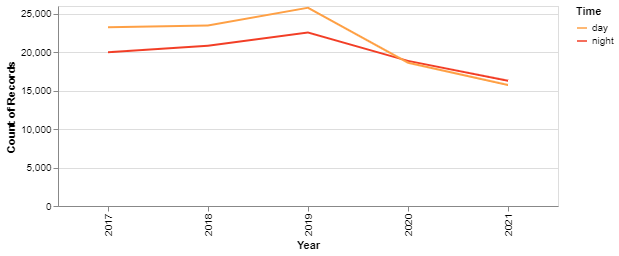

In [71]:
lineplot = alt.Chart(data).mark_line().encode(
    x=alt.X("YEAR:O", title='Year'),
    y=alt.Y('count(HOUR)'),
    color=alt.Color('TIME', scale=alt.Scale(scheme='yelloworangered'), title='Time')
).properties(
    width=500,
    height=200)

lineplot

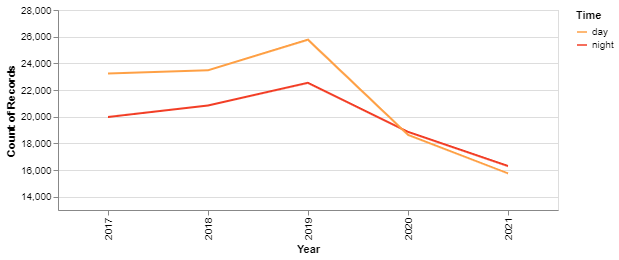

In [70]:
# Adjust Scaling
lineplot = alt.Chart(data).mark_line().encode(
    x=alt.X("YEAR:O", title='Year'),
    y=alt.Y('count(HOUR)', scale=alt.Scale(domain = [13000, 28000])),
    color=alt.Color('TIME', scale=alt.Scale(scheme='yelloworangered'), title='Time')
).properties(
    width=500,
    height=200)

lineplot

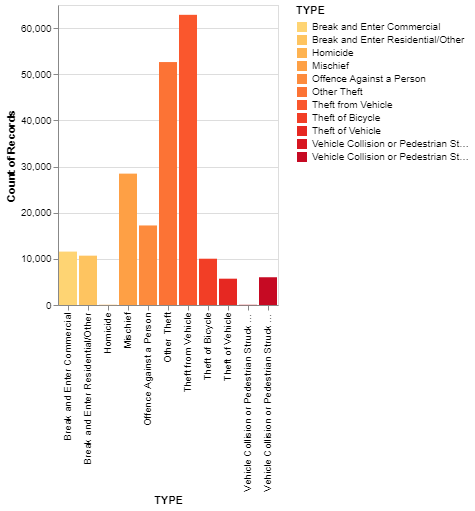

In [78]:
barchart = alt.Chart(data).mark_bar().encode(
    x = alt.X('TYPE'),
    y = alt.Y('count(TYPE)'),
    color=alt.Color('TYPE', scale=alt.Scale(scheme='yelloworangered'))
    )
barchart

In [137]:
bar = pd.DataFrame(data=data[['YEAR', 'TYPE']].value_counts(), columns=['COUNTS']
                  ).reset_index(level=['YEAR', 'TYPE'])

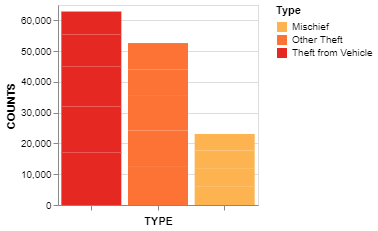

In [176]:
# Use alt.datum.rank to adjust number of bars
barchart = alt.Chart(bar).mark_bar().encode(
    x = alt.X('TYPE', sort='-y', axis=alt.Axis(labels=False)),
    y = alt.Y('COUNTS'),
    color=alt.Color('TYPE', scale=alt.Scale(scheme='yelloworangered'), title='Type')
).transform_window(
    rank='rank(COUNTS)',
    sort=[alt.SortField('COUNTS', order='descending')]
).transform_filter(
    (alt.datum.rank < 15)
).properties(
    width=200,
    height=200)

barchart